In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [18]:
import os
os.getcwd()

'/workspace/notebook'

In [19]:
#ファイルの読込
df = pd.read_csv("../csv/全突合R4マスタ240522.csv")
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)
df.head()

,病院,オープンデータ\n医療機関コード\n(R4),医療機関名_x,都道府県コード_x,二次医療圏コード_x,二次医療圏名_x,構想区域コード_x,構想区域名称_x,市区町村コード_x,市区町村名称_x,医療機関コード（医科）_x,医療機関コード（歯科）_x,設置主体（2022（令和4）年7月1日時点）,DPC医療機関群の種類,特定機能病院の承認の有無,地域医療支援病院の承認の有無,病棟コード\n（R4）,病棟名_x,建築時期,構造,保有する病棟と機能区分の選択状況（2022（令和4）年7月1日時点の機能）,保有する病棟と機能区分の選択状況（2025年7月1日の病床機能の予定）,一般病床_許可病床,一般病床_最大使用病床数,一般病床_最小使用病床数,療養病床_許可病床,療養病床_最大使用病床数,療養病床_最小使用病床数,新規入棟患者数（年間）,在棟患者延べ数（年間）,退棟患者数（年間）
0,病院,101010042,市立函館恵山病院,1,101,南渡島,101,南渡島,1202,函館市,111417382,NaN,市町村,ＤＰＣ病院ではない,無し,無し,101010042101,病棟,2002,鉄筋コンクリート造,慢性期,慢性期,0,0,0,60,40,29,106,12371,110
1,病院,101010069,医療法人社団玄心会吉田眼科病院,1,101,南渡島,101,南渡島,1202,函館市,111416939,NaN,医療法人,ＤＰＣ病院ではない,無し,無し,101010069101,病棟,1983,鉄筋コンクリート造,急性期,急性期,40,40,10,0,0,0,1182,9827,1184
2,病院,101010044,市立函館病院,1,101,南渡島,101,南渡島,1202,函館市,111416756,131436644,市町村,ＤＰＣ標準病院群,無し,有り,101010044101,３階東病棟,2000,鉄骨鉄筋コンクリート造,急性期,急性期,34,23,3,0,0,0,1184,5930,1172
3,病院,101010044,市立函館病院,1,101,南渡島,101,南渡島,1202,函館市,111416756,131436644,市町村,ＤＰＣ標準病院群,無し,有り,101010044102,３階南病棟（休床中）,2000,鉄骨鉄筋コンクリート造,休棟中（今後再開する予定）,高度急性期,16,0,0,0,0,0,0,0,0
4,病院,101010044,市立函館病院,1,101,南渡島,101,南渡島,1202,函館市,111416756,131436644,市町村,ＤＰＣ標準病院群,無し,有り,101010044103,４階東病棟,2000,鉄骨鉄筋コンクリート造,高度急性期,高度急性期,48,48,27,0,0,0,1008,16107,988


In [20]:
print(df.columns)

Index(['病院', 'オープンデータ\n医療機関コード\n(R4)', '医療機関名_x', '都道府県コード_x', '二次医療圏コード_x',
       '二次医療圏名_x', '構想区域コード_x', '構想区域名称_x', '市区町村コード_x', '市区町村名称_x',
       '医療機関コード（医科）_x', '医療機関コード（歯科）_x', '設置主体（2022（令和4）年7月1日時点）',
       'DPC医療機関群の種類', '特定機能病院の承認の有無', '地域医療支援病院の承認の有無', '病棟コード\n（R4）', '病棟名_x',
       '建築時期', '構造', '保有する病棟と機能区分の選択状況（2022（令和4）年7月1日時点の機能）',
       '保有する病棟と機能区分の選択状況（2025年7月1日の病床機能の予定）', '一般病床_許可病床', '一般病床_最大使用病床数',
       '一般病床_最小使用病床数', '療養病床_許可病床', '療養病床_最大使用病床数', '療養病床_最小使用病床数',
       '新規入棟患者数（年間）', '在棟患者延べ数（年間）', '退棟患者数（年間）'],
      dtype='object', name=0)


In [21]:
df["医療機関名_x"].nunique()

6819

In [22]:
#急性期病床のみ抽出
df = df.loc[df["保有する病棟と機能区分の選択状況（2022（令和4）年7月1日時点の機能）"] ==  "急性期"].reset_index(drop=True)
df["医療機関名_x"].nunique()

4013

In [23]:
df = df[["医療機関名_x","都道府県コード_x","一般病床_許可病床","療養病床_許可病床","在棟患者延べ数（年間）","新規入棟患者数（年間）","退棟患者数（年間）"]]
PREF = ["都道府県コード_x"]
TARGETS = ["一般病床_許可病床","療養病床_許可病床","在棟患者延べ数（年間）","新規入棟患者数（年間）","退棟患者数（年間）"]
for col in TARGETS:
    df[col] = pd.to_numeric(df[col]) #object -> int64
df = df.groupby('医療機関名_x')[PREF + TARGETS
                            ].agg({**{m:'first' for m in PREF},**{t:'sum' for t in TARGETS}}).reset_index()
df["病床利用率"] = df["在棟患者延べ数（年間）"] * 100 / (df["一般病床_許可病床"] + df["療養病床_許可病床"]) / 365 #診療実日数を365日とする
df["平均院内日数"] = df["在棟患者延べ数（年間）"] / (df["新規入棟患者数（年間）"] + df["退棟患者数（年間）"]) * 2

In [24]:
# 無限大の値が含まれているか確認
print(df[df['病床利用率'] == np.inf])
print(df[df["平均院内日数"] == np.inf])

Empty DataFrame
Columns: [医療機関名_x, 都道府県コード_x, 一般病床_許可病床, 療養病床_許可病床, 在棟患者延べ数（年間）, 新規入棟患者数（年間）, 退棟患者数（年間）, 病床利用率, 平均院内日数]
Index: []
0                            医療機関名_x 都道府県コード_x  一般病床_許可病床  療養病床_許可病床  \
37                            くぼかわ病院        39         50          0   
106                        アイビークリニック         8         31         24   
122              ツル虎ノ門外科・リハビリテーション病院        19         37          0   
260                          二本松眼科病院        13         39          0   
336                             偕生病院        28         36          0   
347                            光生会病院        23        113          0   
378               公益財団法人 心臓血管研究所付属病院        13         68          0   
487                           冨士ヶ丘病院        10         51          0   
505                           前橋協立病院        10        105          0   
542                            北深谷病院        11          5          0   
564                        医療法人 岡田病院        28         25          0   
583   

In [25]:
df.loc[df["医療機関名_x"]=="社会医療法人恵佑会札幌病院"]

,医療機関名_x,都道府県コード_x,一般病床_許可病床,療養病床_許可病床,在棟患者延べ数（年間）,新規入棟患者数（年間）,退棟患者数（年間）,病床利用率,平均院内日数
3268,社会医療法人恵佑会札幌病院,1,209,0,1776,0,0,2.328112,inf


In [26]:
prefecture_region_map = {
    '1': 1, '2': 2, '3': 2, '4': 2, '5': 2, '6': 2, '7': 2,  # 北海道地方、東北地方
    '8': 3, '9': 3, '10': 3, '11': 3, '12': 3, '13': 3, '14': 3,  # 関東地方
    '15': 4, '16': 4, '17': 4, '18': 4, '19': 4, '20': 4, '21': 4, # 中部地方
    '22': 5, '23': 5, '24': 5,  # 東海地方
    '25': 6, '26': 6, '27': 6, '28': 6, '29': 6, '30': 6,  # 近畿地方
    '31': 7, '32': 7, '33': 7, '34': 7, '35': 7,  # 中国地方
    '36': 8, '37': 8, '38': 8, '39': 8,  # 四国地方
    '40': 9, '41': 9, '42': 9, '43': 9, '44': 9, '45': 9, '46': 9, '47': 9  # 九州地方
}
df["地方コード_x"] = df["都道府県コード_x"].map(prefecture_region_map)
df

,医療機関名_x,都道府県コード_x,一般病床_許可病床,療養病床_許可病床,在棟患者延べ数（年間）,新規入棟患者数（年間）,退棟患者数（年間）,病床利用率,平均院内日数,地方コード_x
0,AOI国際病院,14,114,0,39388,3585,3610,94.659938,10.948714,3
1,JA静岡厚生連遠州病院,22,320,0,78466,6102,5637,67.179795,13.368430,5
2,あいちせぼね病院,23,48,0,9412,1598,1604,53.721461,5.878826,5
3,あおぞら病院,44,30,0,10266,446,438,93.753425,23.226244,9
4,あおばウィメンズホスピタル,14,20,0,3928,876,876,53.808219,4.484018,3
...,...,...,...,...,...,...,...,...,...,...
4008,ＮＨＯ栃木医療センター,9,332,0,90130,8754,8735,74.376960,10.307050,3
4009,ＮＴＴ東日本伊豆病院,22,50,0,16015,538,531,87.753425,29.962582,5
4010,ＮＴＴ東日本札幌病院,1,296,0,71657,8994,8989,66.324509,7.969416,1
4011,ＮＴＴ東日本関東病院,13,508,0,136816,16507,16331,73.787078,8.332785,3


In [27]:
df.groupby('地方コード_x').size()

地方コード_x
1     276
2     269
3    1097
4     323
5     270
6     642
7     290
8     185
9     661
dtype: int64

In [28]:
region_means = df.groupby('地方コード_x')["病床利用率"].mean()
print(region_means)

地方コード_x
1    64.820456
2    67.502221
3    68.637339
4    70.618870
5    69.089134
6    70.405394
7    74.762187
8    74.865768
9    73.796794
Name: 病床利用率, dtype: float64


In [29]:
import matplotlib as mpl
import matplotlib.font_manager as fm

font_path = '/workspace/hba/visualization/MS Gothic.ttf' # フォントファイルへの絶対パス
fm.fontManager.addfont(font_path) # フォントマネージャーにフォントを追加

# 使用可能なフォントの一覧を取得
fonts = [f.name for f in fm.fontManager.ttflist]
print(fonts)

# matplotlibが使用しているフォントをMS Gothicに指定
mpl.rcParams['font.family'] = 'MS Gothic'

['DejaVu Serif', 'STIXGeneral', 'STIXSizeOneSym', 'STIXSizeFiveSym', 'STIXSizeOneSym', 'STIXSizeFourSym', 'DejaVu Sans Mono', 'cmtt10', 'STIXSizeFourSym', 'DejaVu Sans Display', 'STIXNonUnicode', 'STIXGeneral', 'cmsy10', 'cmr10', 'DejaVu Serif', 'DejaVu Sans', 'DejaVu Sans', 'cmmi10', 'DejaVu Serif Display', 'DejaVu Sans', 'DejaVu Serif', 'DejaVu Serif', 'STIXSizeTwoSym', 'STIXSizeThreeSym', 'DejaVu Sans', 'STIXNonUnicode', 'cmex10', 'STIXSizeThreeSym', 'STIXGeneral', 'DejaVu Sans Mono', 'STIXSizeTwoSym', 'STIXNonUnicode', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'cmss10', 'cmb10', 'STIXGeneral', 'STIXNonUnicode', 'DejaVu Sans', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Sans Mono', 'DejaVu Sans', 'DejaVu Sans Mono', 'MS Gothic', 'MS Gothic']


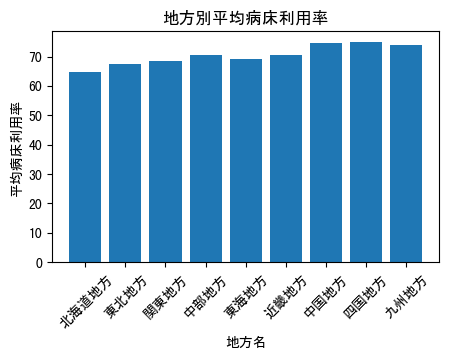

In [30]:
# 地方名のリスト
region_names = ['北海道地方', '東北地方', '関東地方', '中部地方', '東海地方', '近畿地方', '中国地方', '四国地方', '九州地方']
region_names_map = {y:x for x,y in zip(region_names,range(1,len(region_names)+1))}

region_means_df = region_means.to_frame(name='平均病床利用率')
region_means_df = region_means_df.reset_index()
region_means_df['地方名'] = region_means_df['地方コード_x'].map(region_names_map)

plt.figure(figsize=(5, 3))
plt.bar(region_means_df['地方名'], region_means_df['平均病床利用率'])
plt.xlabel('地方名')
plt.ylabel('平均病床利用率')
plt.title('地方別平均病床利用率')
plt.xticks(rotation=45)
plt.show()

In [31]:
df = df[df["平均院内日数"] != np.inf]
region_means = df.groupby('地方コード_x')["平均院内日数"].mean()
print(region_means)

地方コード_x
1    19.081444
2    19.413476
3    17.487263
4    16.082711
5    16.143696
6    17.734070
7    17.553181
8    20.622450
9    17.926707
Name: 平均院内日数, dtype: float64


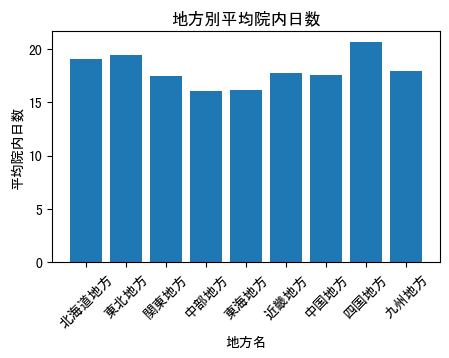

In [32]:
region_means_df = region_means.to_frame(name='平均院内日数')
region_means_df = region_means_df.reset_index()
region_means_df['地方名'] = region_means_df['地方コード_x'].map(region_names_map)

plt.figure(figsize=(5, 3))
plt.bar(region_means_df['地方名'], region_means_df['平均院内日数'])
plt.xlabel('地方名')
plt.ylabel('平均院内日数')
plt.title('地方別平均院内日数')
plt.xticks(rotation=45)
plt.show()